# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [72]:
import numpy as np
import numpy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_openml

## 1. Data

In [73]:
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

In [74]:
print ('X Shape: ', X.shape)

X Shape:  (70000, 784)


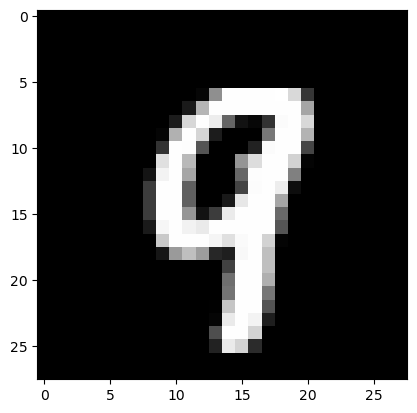

In [75]:
plt.imshow(X[800].reshape((28, 28)), cmap=cm.gray)

## 2. SVD

In [76]:
X_mean = numpy.mean(X, axis=0, keepdims=True)
X = X - X_mean

In [107]:
X_reduced, singular_values, components = numpy.linalg.svd(X, full_matrices=False)

In [108]:
# # Transforming the data
# svd = TruncatedSVD(n_components=783, algorithm='arpack')

# X_reduced = svd.fit_transform(X)

In [109]:
X_reduced.shape, singular_values.shape, components.shape

((70000, 784), (784,), (784, 784))

## 3. Visualizing reduced data points

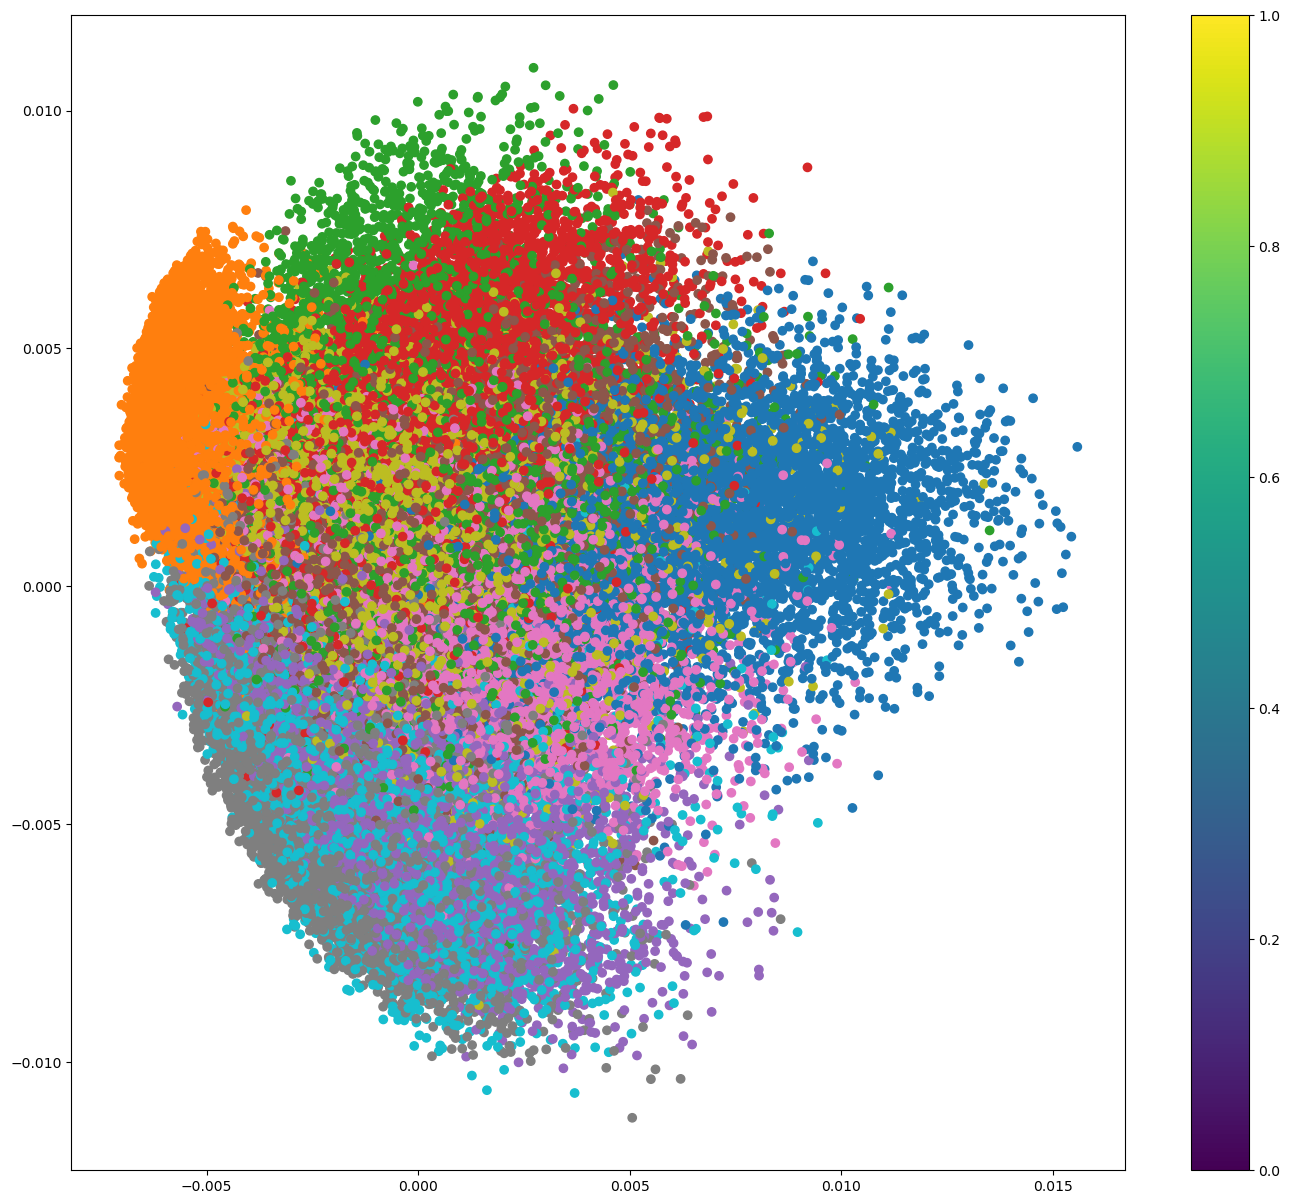

In [110]:
cmap = plt.get_cmap('tab10')

plt.figure(figsize=(17, 15))
# for n in range(X_reduced.shape[0]):
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = [cmap(int(y_)) for y_ in y])
plt.colorbar()

## 4. Analysis

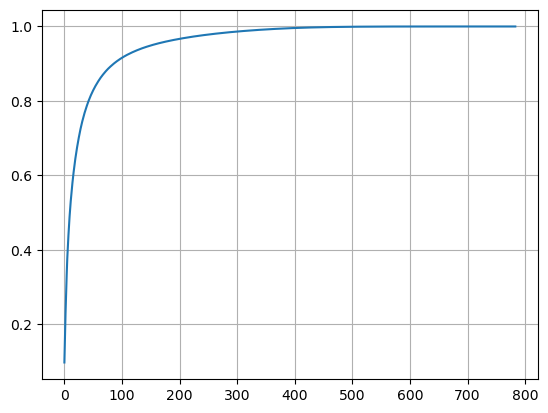

In [111]:
# Important thing - How much variance is explained by each dimension

plt.figure()
plt.plot(numpy.cumsum(singular_values ** 2) / numpy.sum(singular_values ** 2))
plt.grid('on')
plt.show()

## 5. Visualizing the right singular vectors

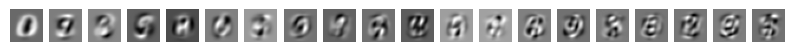

In [112]:
n_svs = 20

plt.figure(figsize=(10, 10))

for sid in range(n_svs):
    plt.subplot(1, n_svs, sid+1)
    plt.imshow(components[sid].reshape((28, 28)), cmap=cm.gray)
    plt.axis('off')

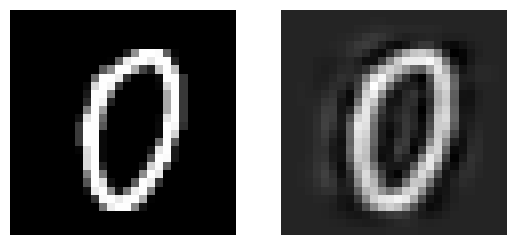

In [122]:
idx = 1000
n_comps = 78

plt.figure()
plt.subplot(1,2,1)
plt.imshow((X[idx,:]+X_mean).reshape((28,28)), cmap=cm.gray)

plt.axis('off')

plt.subplot(1,2,2)

u_reduced = X_reduced[idx, :n_comps]
sv_reduced = singular_values[:n_comps]
usv = u_reduced * sv_reduced
v_reduced = components[:n_comps,:].T
recon = (v_reduced * usv[None,:]).sum(1)
recon = recon + X_mean
# recon = numpy.maximum(recon, 0)

plt.imshow(recon.reshape((28,28)), 
           cmap=cm.gray)
plt.axis('off')
plt.show()